# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np    #importing numpy library
import pandas as pd   #importing pandas library

# import libraries for data visualization
import matplotlib.pyplot as plt   #importing matplotlib library
import seaborn as sns             #importing seaborn  library
from pandas import DataFrame

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the data
df = pd.read_csv('/Users/dearraid/Desktop/numpyfiles/foodhub_order.csv') #loading the .csv datset as 'df'
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print('There are ',df.shape[0],' rows and ',df.shape[1],' columns.') #Will print the number of rows and columns

There are  1898  rows and  9  columns.


#### Observations:
There are one thousand eight hundred ninety eight(1898) rows and nine(9) columns. Where each row tells the about the order details of each customer and every row is a category that an order includes.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()  #will reveal the count of non-null values and data types too

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We can see that there are three(3) types of data. Integer, object and float. If we look into the rating column we would see that it has integers too but, the data type for 'rating is being shown 'object'. If we again look into the head then, we will see a lot of 'Not given' values. And, also there are no columns that contains null values which is important and helpful for us too.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
#calculates the number of total null values from the dataset
df.isnull().sum() #will generate the summ of all null values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
The sum of null values or number of missing values are 0, which is checked by .sum() function. 


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()  #built in function describe will show the statistical summary

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The minimum time it takes for the food to be prepared after the order placed is 20 mints. The average time it takes is overall 27 minutes. And, the max is 35 minutes. 50% of the order costs $14. And, another surprising thing is 50%, 75% and maximum rating was all 5. So, we need also to check on that too the to be more precise. The total maximum time was (food_preparation_time+delivery_time) 68 minutes. 

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].value_counts(dropna=False) #dropna parameter which is equal to false, will count the 'not given' and nan values

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
df['rating'] = df['rating'].replace(['Not given'],np.nan) #replacing the not provided values

# changing the data type to float
df['rating'] = df['rating'].astype(float) #setting the rating datatype as float

In [ ]:
#df.drop(['BuildingArea'],inplace= True,axis = 1)

In [ ]:
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [ ]:
df.duplicated('order_id').sum() #generates the total duplicated values across the dataset

0

In [ ]:
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Cost of the Order

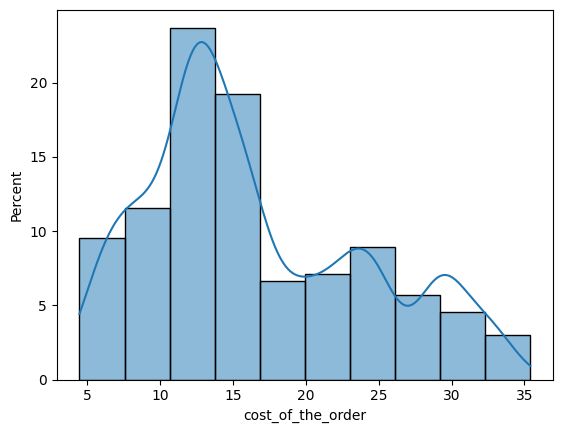

<Axes: xlabel='cost_of_the_order'>

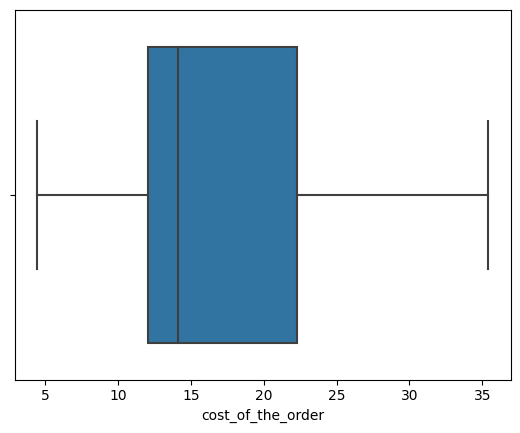

In [ ]:
# Write the code here
#Observation of the 
sns.histplot(data = df, x = 'cost_of_the_order',bins = 10, stat = 'percent', kde = True)
plt.show()
sns.boxplot(data = df, x = 'cost_of_the_order')

Observations



For the First histoplot we see that more than 20% of the orders were more than  10 dollars, and less than   15 dollars. It is a left skewed histoplot. The kde curve actually seems to jumpat those bars and the difference is really clear. The Boxplot is right skewed, the median price is less than $ 15. There are no outliners. The maximum cost is $35. The 75 th percentile of the cost is between  20 and 25 dollars. There also seems to be a big gap between the maximum cost and the 75th percentile cost. 

 Food preperation time

Text(0.5, 1.0, 'Food preperation times and their percentages')

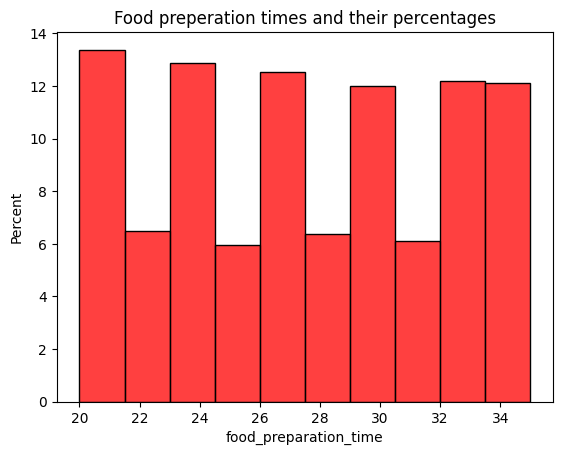

In [ ]:
sns.histplot(data = df, x = 'food_preparation_time',bins = 10, stat = 'percent',color='r');
plt.title("Food preperation times and their percentages")

Observation

The food preperation percentage seems to go up and down. But, an unique pattern is that it is evenly distributed. There is barely any strange looking bars. The percentages are really close too. Most food preparation time with more odd numeric minutes seems to show less percentage to appear compared to the even numeric minutes which mostly showed a higher percentage. 

Popularity of different cuisines

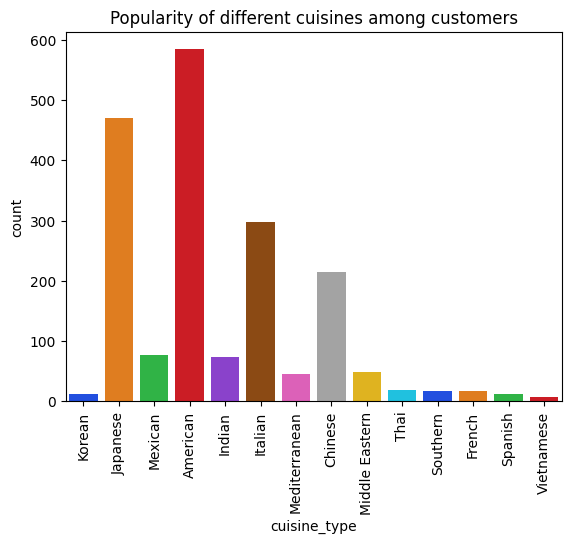

In [ ]:
sns.countplot(data = df, x = 'cuisine_type',palette = 'bright');
plt.xticks(rotation = 90)
plt.title(('Popularity of different cuisines among customers'))
plt.show()

Observation

Here the most popular cuisine among all seems to be 'American'. It ranks the highest in counts (almost 600). Now, the main reason it might have as that the popularity of 'American' fast foods. It is cheap, fast to eat and easily made. Our data contains students too and teenagers would choose fastfood as a quick alternative for meals. And also, busy professionals who dosen't have too much time to expect a meal other than something that dosen't make him full rather not hungry too. Relatively Japanese and Italian comes next. For Japanese the counts were more than 450 and Italian counted 300. Maybe the Japaneese Sushi and Italian Pizza seems as a quick alternative too during lunch hours. 

Ratings

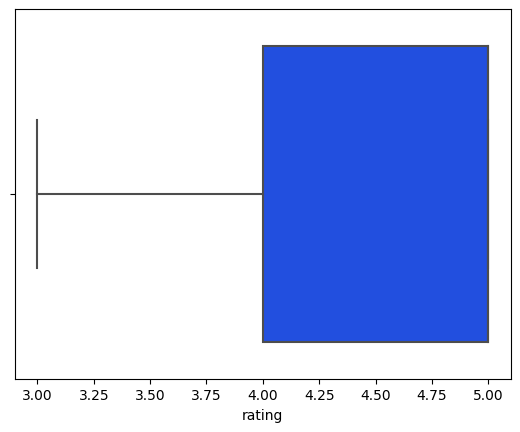

In [ ]:
sns.boxplot(data=df,x = 'rating',palette='bright')
plt.show()

Observation

The data completely left-skewed which was expecting. The least rating was 4 and the median rating was 4.5. The maximum was 5. This are very perfect numbers. This might happen as customers didn't have too much time or care for the ratings or the meals were really good enough. But, since there is barely any rating less than 4 and a lot of missing ratings, this actually needs a further research. 

Delivery Time

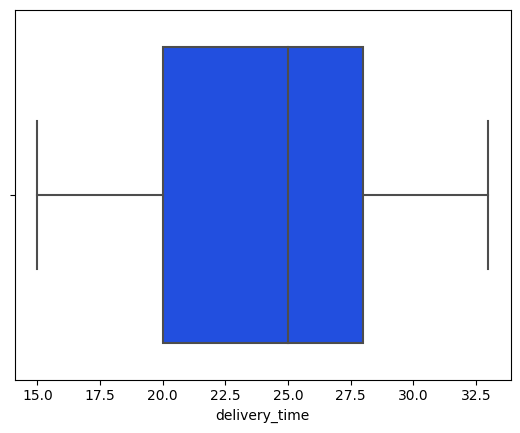

In [ ]:
sns.boxplot(data=df,x = 'delivery_time',palette='bright') #generating boxplot from dataset referring as 'df' and x being delivery time, the palette is optional for boxplot but, we used it as set it to bright colors
plt.show()

Observations:

The median delivery time shows was 25 minutes. And, the maximum shows more 32.5 minutes. A major reason would be because of New York's traffic jam. The delivery drivers most probably spends a quite an amount of time after the traffic jam. I think the time could have been less if the driver wouldn't have stuck on a traffic jam because the 25th percentile is 20 minutes too.

Days of the week

Text(0.5, 1.0, 'Customer engagement during Weekdays and Weekends')

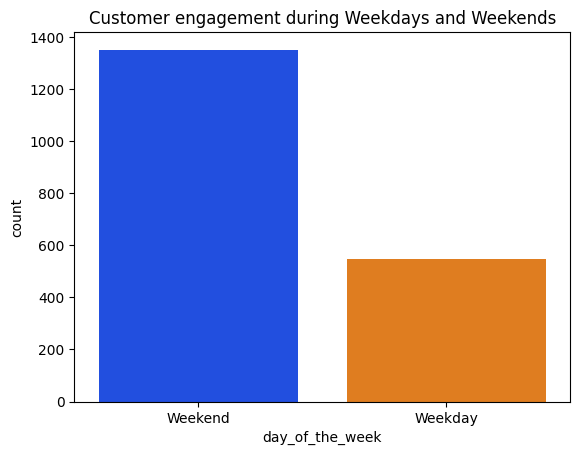

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week',palette = 'bright'); #countplot will generate the univariate difference customer engagement between weekdays and weekends
plt.title(('Customer engagement during Weekdays and Weekends'))

Observation

In this countplot we can see that there are far more customer engagements on weekends than on weekdays. Maybe because the customers does not wanna cook or get out of the house on weekends. 

Customer Id


The number of order id being repeated is  698  times.
The number of duplicate order id is  1200  .


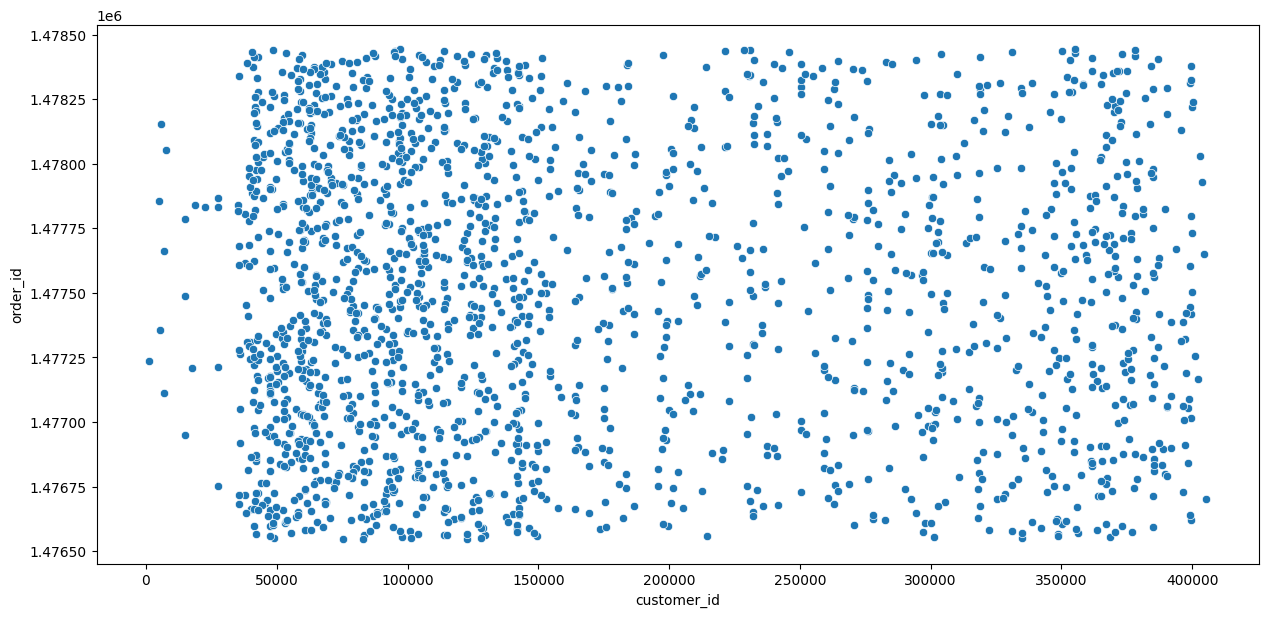

In [ ]:
#the code will give us a more clear vision of how many duplicated values
new_sum = df.duplicated('customer_id').sum()
print("The number of order id being repeated is ",new_sum," times.")
new_id = df['customer_id'].nunique() #counts the number of duplicated rows
print("The number of duplicate order id is ",new_id," .")
#the figure will show the cluster of points
plt.figure(figsize=(15,7)) #customized figure size
sns.scatterplot(data=df, x='customer_id', y ='order_id')
plt.show()

Observation:

Here, in this scatterplot we will see that cluster of 'Customer Id' around one value of Order Id sometimes. We will observe that there are more than one exact same customer id used while ordering more than once.

Observation on order id

In [ ]:
df['order_id'].nunique() #it will generate the number of non-unique values

1898

Observations:
We will see that each time a customer has placed an order the system was able to create an unique new order id sucessfully.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5) 
#In descending order the code will generate the number of restaurants

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

'Shake Shack' topped the list with most orders(219), 'The Meatball Shop'(132), 'Blue Ribbon Sushi(119), 'Blue Ribbon Fried Chicken'(96) and 'Parm'(68) respectively. Shake Shack seems to be a American fastfood place. And also we have seen that the American cuisine was the most popular out of all cuisines. 

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

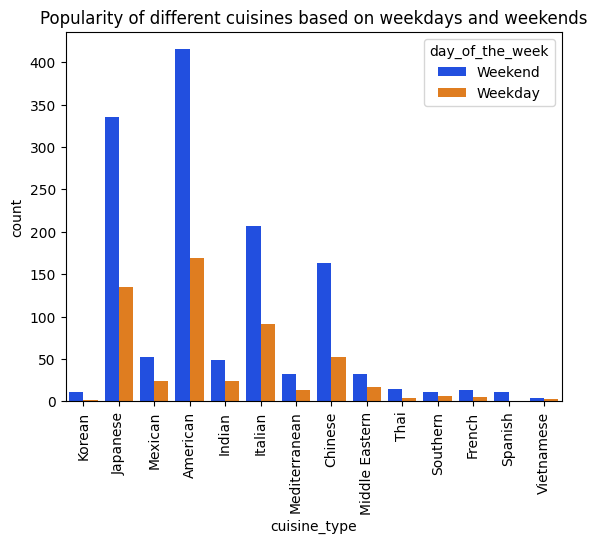

In [ ]:
# Write the code here
#code shows the popularity of different cuisines based on weekdays and weekends
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week',palette='bright')
plt.xticks(rotation=90)
plt.title("Popularity of different cuisines based on weekdays and weekends")
plt.show()

#### Observations:

From the countplot visualization we can see that American cuisine is the most popular on 'Weekends' as well as on 'Weekdays' too.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
sum_number = df['cost_of_the_order'].count()
#counting the cost of the orders
order_above = df['cost_of_the_order'][df['cost_of_the_order']>20].count()
#counting the number of orders more than $20
probability = round((order_above/sum_number)*100,2)
print('The total percentage of orders above $20 is ',probability,"%")

The total percentage of orders above $20 is  29.24 %


#### Observations:
Percentage of orders above $20 is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
delivery_time = round((df['delivery_time'].mean()),2)
#calculates the mean delivery time
print("Observation: The mean delivery time is",delivery_time,"minutes.")

Observation: The mean delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
#extracting the first 3 rows
#the code groups the customer id with most number of orders and then isolates them
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:

Customer id: 52832 has placed the highest amount of orders '13', 47440 with 10 orders and 83287 with 9 orders will recieve a 20% discount from the company as the most frequent customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Rating Vs Food preparation time

/var/folders/wd/_ks2q9js4k1blpm4g9qwzzvh0000gn/T/ipykernel_1360/1108047677.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='food_preparation_time', y ='rating',ci=None);


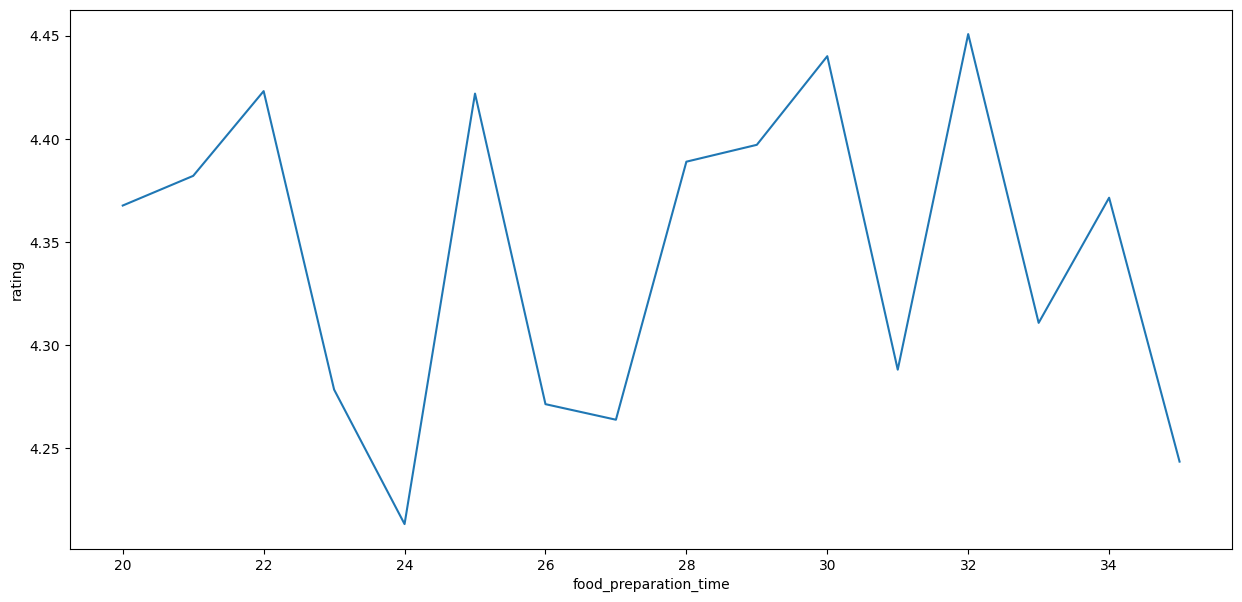

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='food_preparation_time', y ='rating',ci=None);
#the above code will generate a lineplot with x as the food preparation time and y as the rating
plt.show()


The rating vs food preparation time lineplot seems to bit odd. We see that rating 4.25 on a 24 minutes food preparation time where, rating more than 4.40 for a 25 minutes food preparation time. 

Rating vs Total Time

/var/folders/wd/_ks2q9js4k1blpm4g9qwzzvh0000gn/T/ipykernel_1360/312543251.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='Total_time',y='rating',ci=None) #generating lineplot


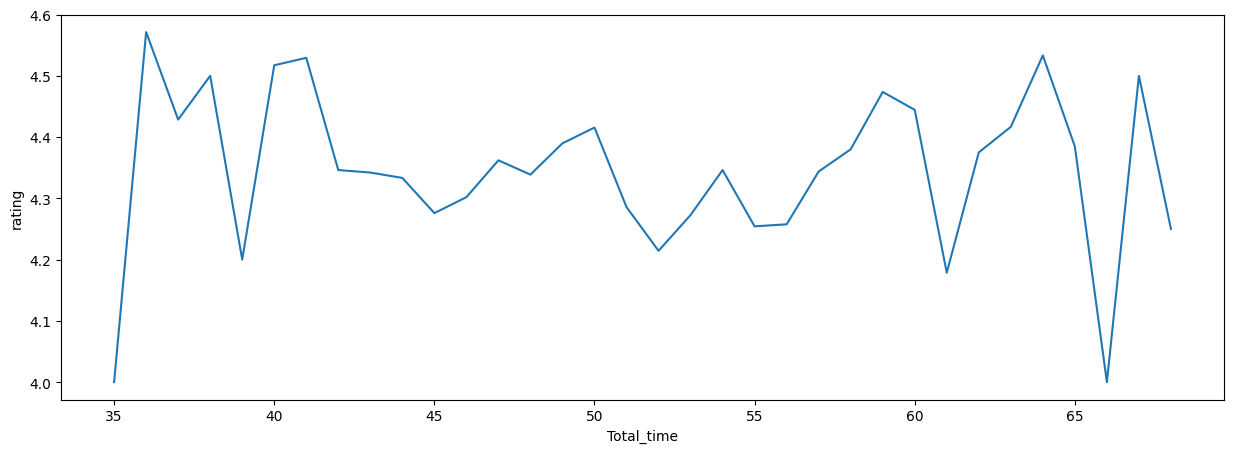

In [ ]:
df['Total_time'] = df['food_preparation_time'] + df['delivery_time']
#creating a new column which says total time sum o 'food_preparation_time' and 'delivery_time'
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='Total_time',y='rating',ci=None) #generating lineplot
plt.show()

The rating vs total time lineplot seems also bit odd. We see that rating 4 on a 35 minutes total time where, rating more than 4.5 for a 42 minutes total time. 

Rating vs Food Delivery Time vs Cuisine

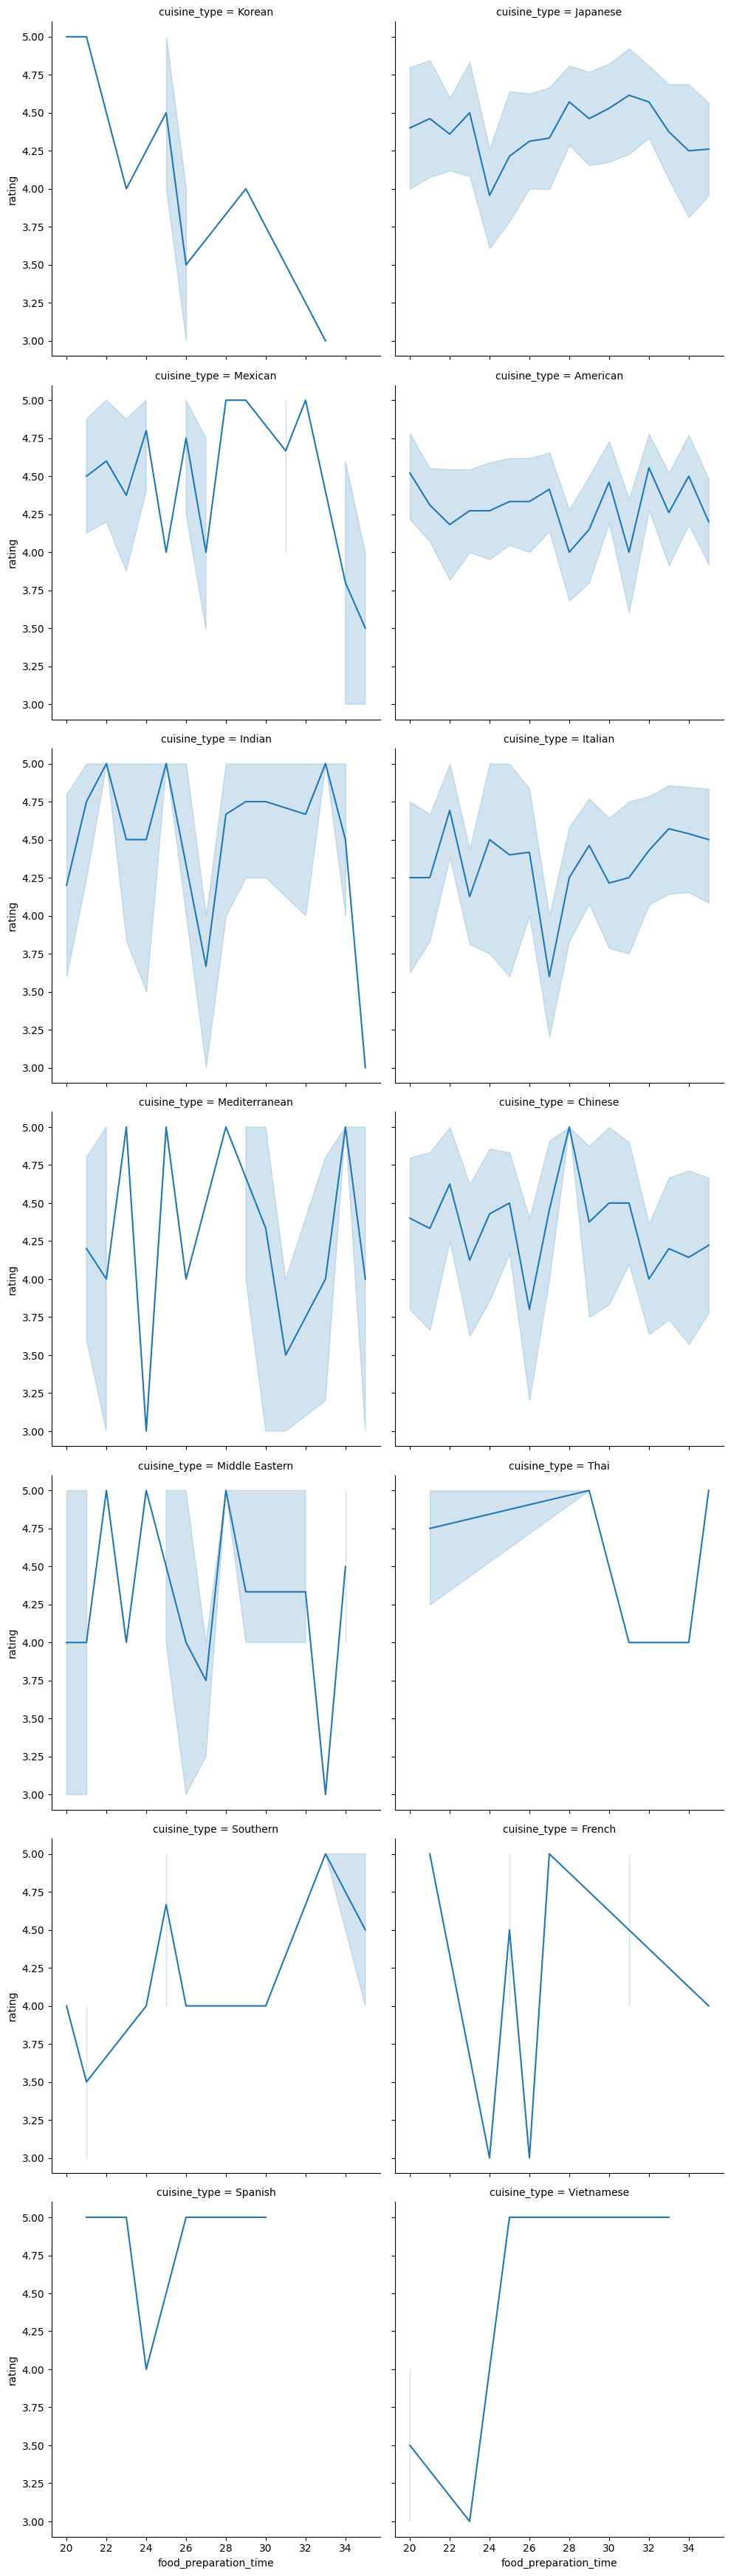

In [ ]:
sns.relplot(
    x='food_preparation_time', #generating a lineplot as x = food_preparation_type and y as the rating
    y='rating', 
    data=df, 
    kind='line', 
    col='cuisine_type',col_wrap = 2); #col_wrap will generate more than one image based on the numeric value provided on one column

Observation:

For the very first cuisine 'Korean' vs the 'delivery_time' the rating seems to drop when the preparation time was increasing too. Also, if we take 'Spanish' cuisine we will see how the rating dropped at the 24th minute suddenly and re-jumped at the 5.00 rating at the 26th minute. The 'French' cuisine also looks bit odd too. So, I think we need more research on this section.

Rating vs Cuisine type

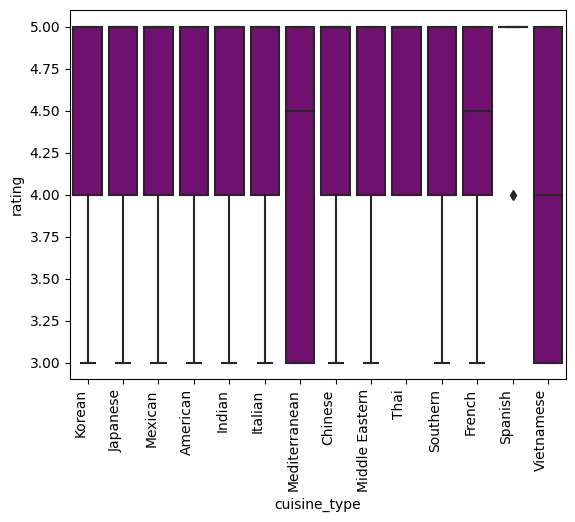

In [ ]:
sns.boxplot(
    x='cuisine_type', 
    y='rating',                  
    data=df, 
    color='purple')
plt.xticks(rotation=90,      #the x values of the generated boxplot will rotate 90 degrees
           ha='right');

Observation:

The majority of the ratings are left skewed here except the cuisines 'Meditarranean' and 'Spanish'. I will mention once again that the ratings column needs more explicit research. Because this is another dimension of the rating column and it still dosen't seem too satisfactory.

Cost Of The Order vs Cuisine type

<Figure size 1500x500 with 0 Axes>

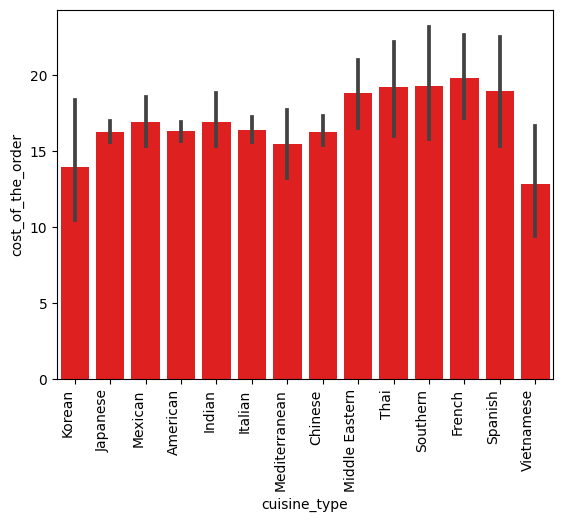

<Figure size 1500x500 with 0 Axes>

In [ ]:
sns.barplot(
    x='cuisine_type', 
    y='cost_of_the_order', 
    data=df, 
    color='red')
plt.xticks(rotation=90, ha='right');
plt.figure(figsize=(15,5))

Observation:

The barplot shows the average cost of an order from different cuisines and their frequency of their maximum price. 

Cuisine type vs Total time vs Days of the Weeks

/var/folders/wd/_ks2q9js4k1blpm4g9qwzzvh0000gn/T/ipykernel_1360/843971609.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


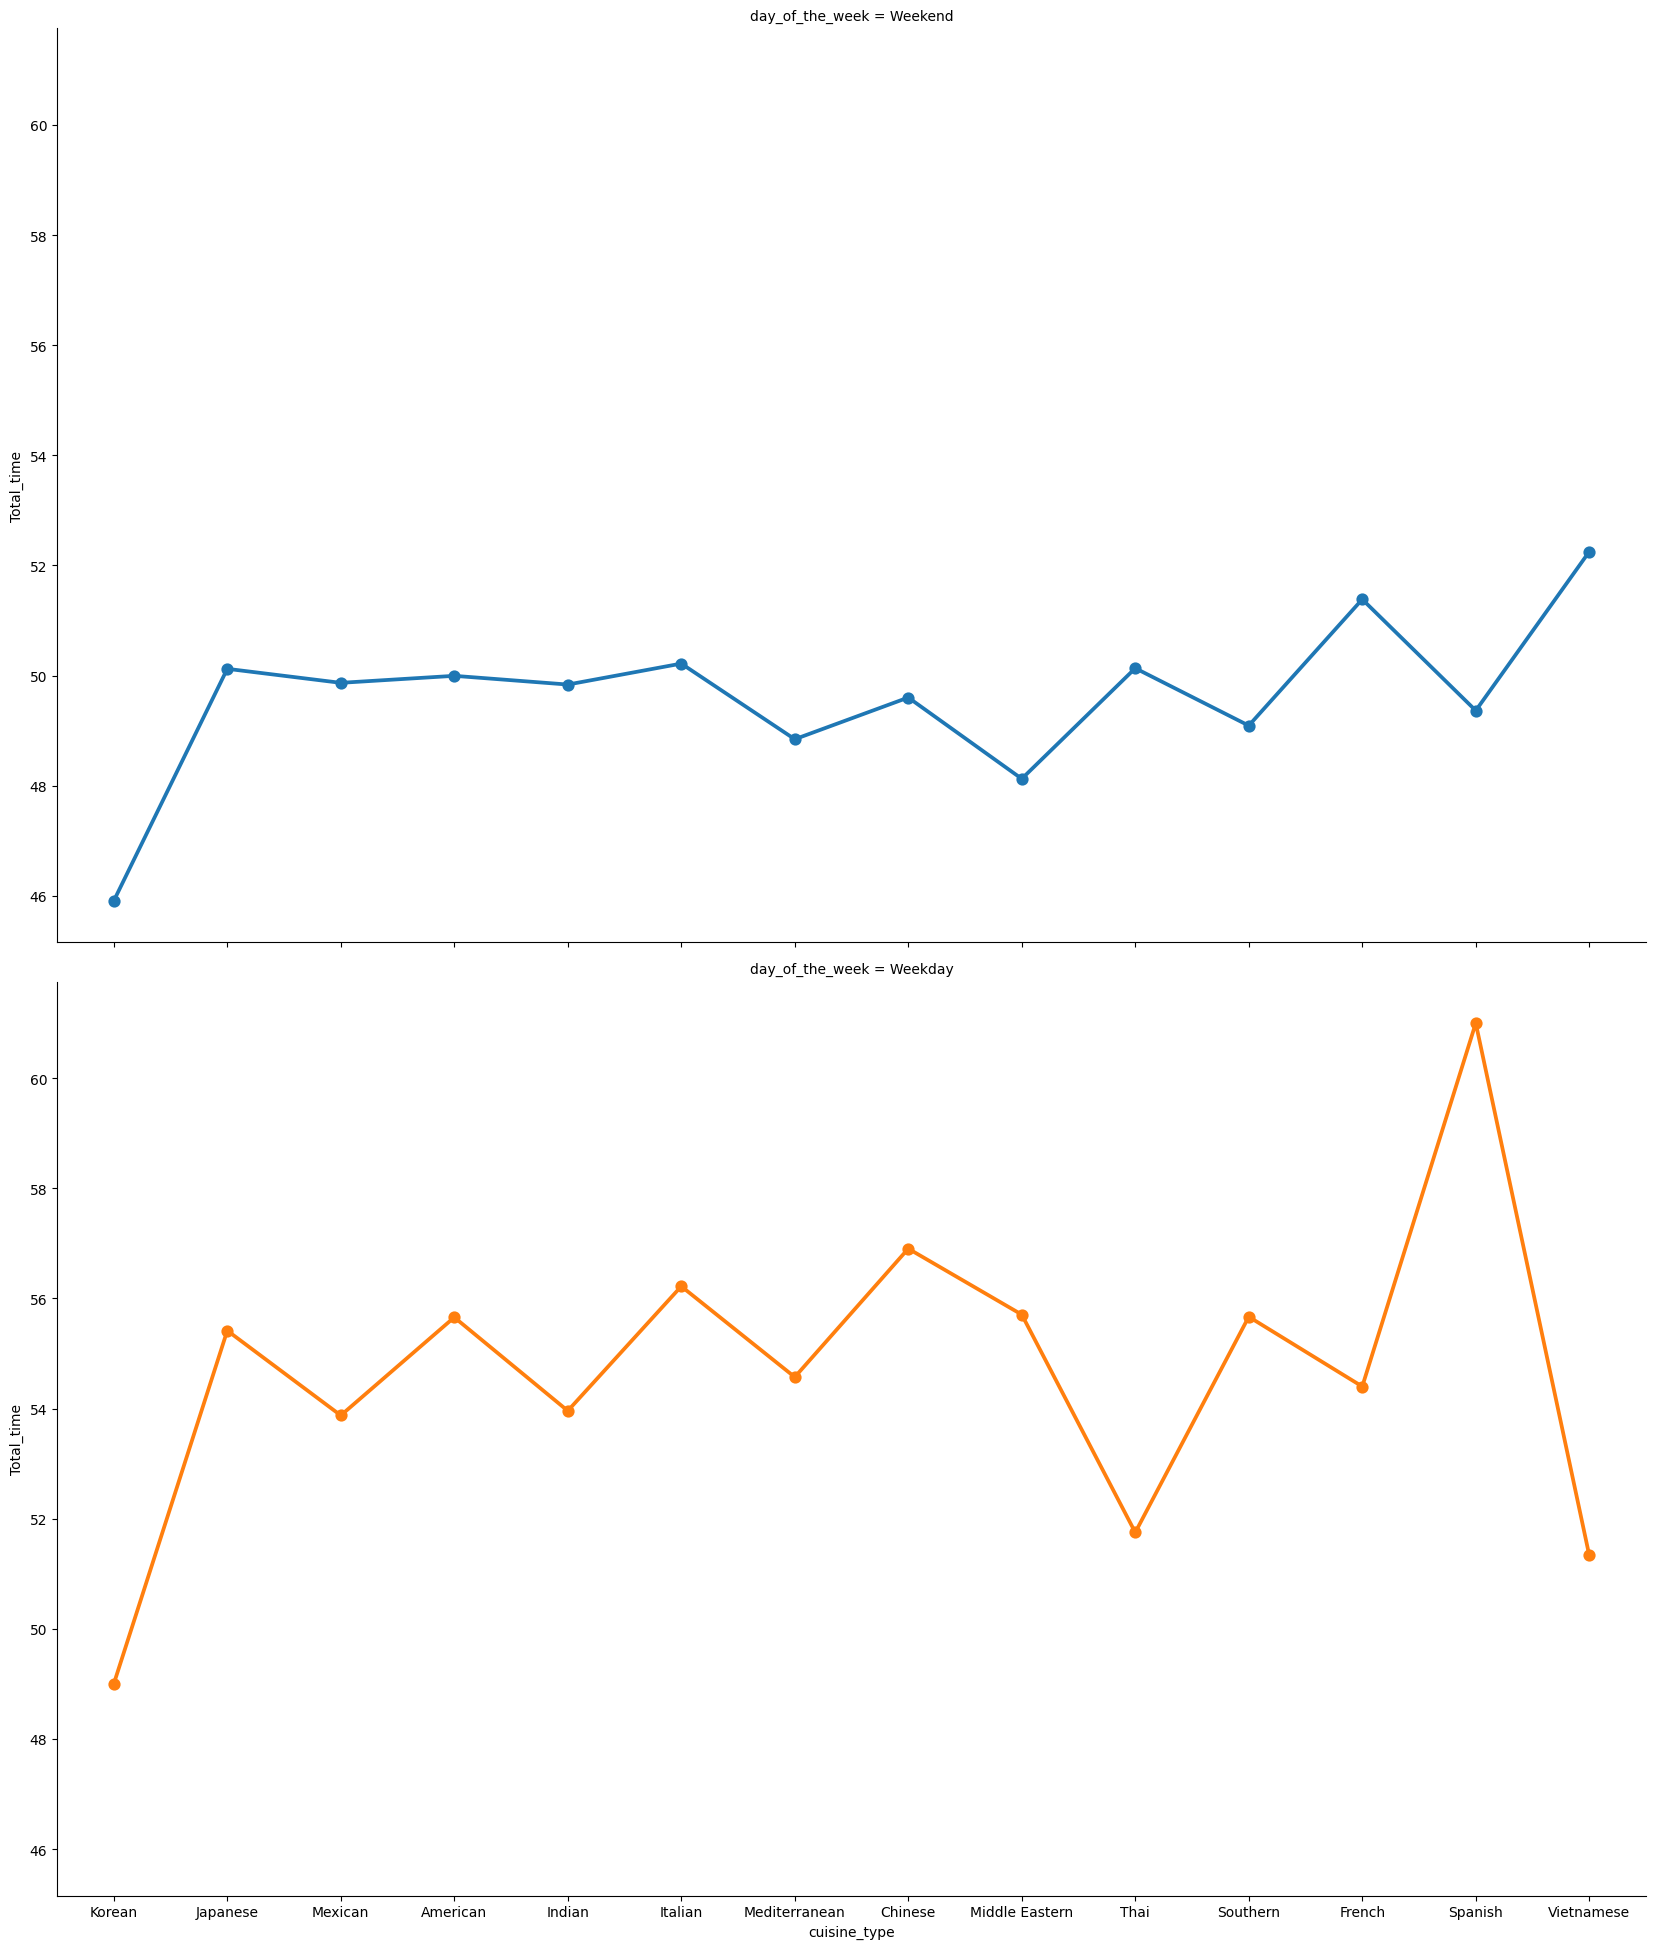

In [ ]:
sns.catplot(
    x='cuisine_type', 
    y='Total_time', 
    data=df, 
    ci=None,
    height=9.8, #default 
    aspect=1.7,
    kind='point',
    hue='day_of_the_week', 
    col='day_of_the_week', 
    col_wrap=1);


Observation:

The catplot here shows the angle of 'Cuisine_Type vs Total time' based on the days of the week. Now we can get an more accurate visualization of how much time it takes to deliver and prepare food by each cuisines. Also, precisely weekends vs weekdays. I think the  time may differ if its actually a 'drive-thru' type restaurant or 'diner' so more than cusines I would say the different restaurant are actually creating the difference here.

Cuisine Type vs Total Time

Text(0.5, 1.0, 'Comparative total time taken by different cuisines  ')

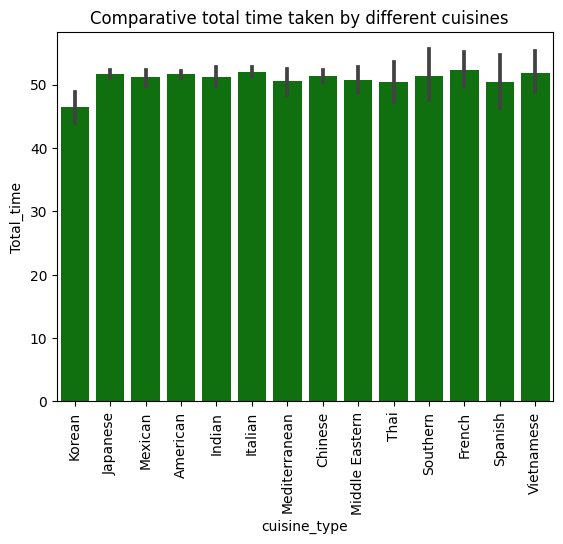

In [ ]:
sns.barplot(
    x='cuisine_type',       #a barplot with x as cuisine type and y as total time and the x values will rotate to 90
    y='Total_time',            
    data=df, 
    color='green');
plt.xticks(rotation=90);
plt.title("Comparative total time taken by different cuisines  ")

Observation:

The barplot shows the frequency of the time taken by different cuisines. 

Cuisine Type vs Cost of the order

Text(0.5, 1.0, 'Cost of the orders based on different cuisine')

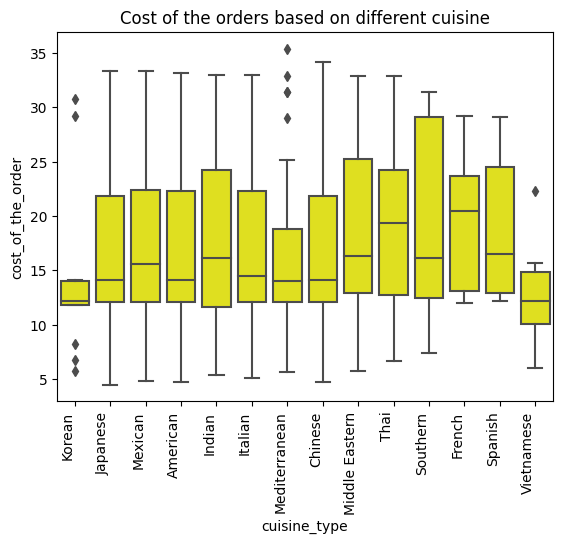

In [ ]:
sns.boxplot(
    x='cuisine_type', 
    y='cost_of_the_order', # the boxplot shows x as the cuisine type and y as the cost with the x axis rotation of 90 degrees
    data=df, 
    color='yellow')
plt.xticks(rotation=90, 
           ha='right');
plt.title("Cost of the orders based on different cuisine")

Observation:

The boxplot shows a more detailed image that for a cuisine to charge for their meals. Here for the 'Korean' cuisine, we see a lot of outliners when the median is less than $14. Same way we see the 'Mediterranean' cuisine also shows couple outliners when the maximum is 25 dollars. So, the 'cost_of_the_order' columns needs to be cross-checked I believe.

Delivery Time vs Days of the week

Text(0.5, 1.0, 'Denesity of data of delivery time between weekdays and weekends')

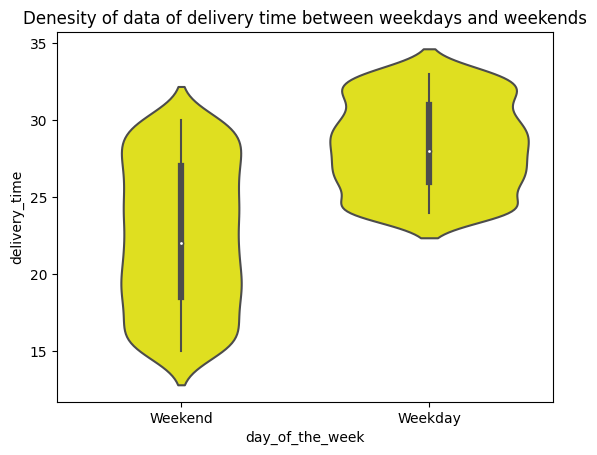

In [ ]:
sns.violinplot(
    x='day_of_the_week', 
    y='delivery_time', 
    data=df, 
    color='yellow');
plt.title("Denesity of data of delivery time between weekdays and weekends")

Observation:

The density of weekend and weekday tells us that how the delivery time data's were distributed. We see the plot to be quite dense by their median point. And also the shape follows even after the interquartile range line which means that we have some whiskers too. 

Heatmap table between all the variables

/var/folders/wd/_ks2q9js4k1blpm4g9qwzzvh0000gn/T/ipykernel_1360/614722447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


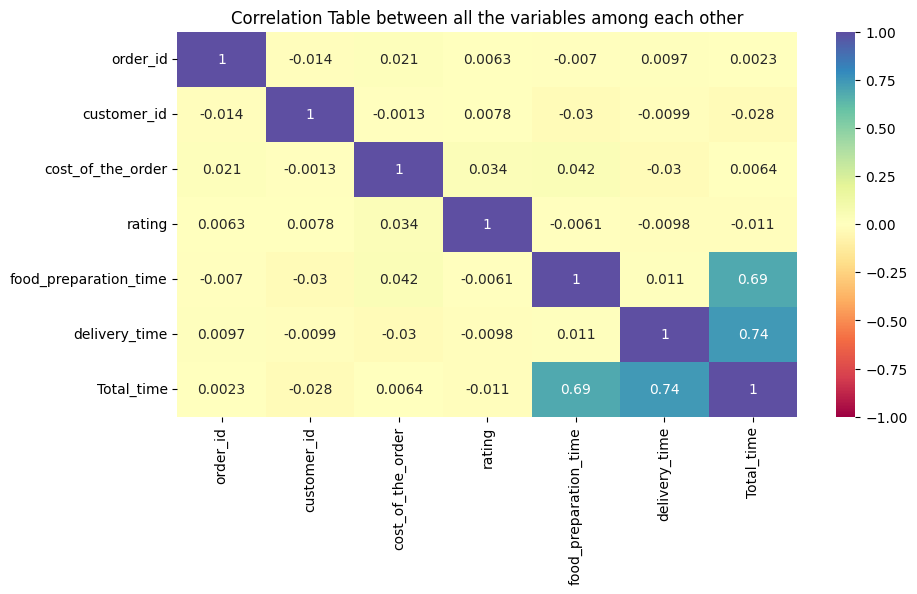

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.title("Correlation Table between all the variables among each other")
plt.show()

Observation:

The heatmap represents a weak correlation overall.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
#a dataset containing a mean value more than 4
rated_rst = df[['restaurant_name','rating']].groupby('restaurant_name').mean()>4
#a dataset containg ratings countained more than 50 which is grouped by restaurant names
rated_rst2= df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50
#now merging the mean restaurant datasets mean being more than 4 and atleast having more than 50 ratings by .merge() function
qualified_restaurants = pd.merge(rated_rst[rated_rst['rating']== True], rated_rst2[rated_rst2['rating']== True],on ='restaurant_name')
qualified_restaurants



,rating_x,rating_y
restaurant_name,,
Blue Ribbon Fried Chicken,True,True
Blue Ribbon Sushi,True,True
Shake Shack,True,True
The Meatball Shop,True,True


#### Observations:

The only restaurants qualifies for the promotional offers are 'Blue Ribbon Fried Chicken',
'Blue Ribbon Sushi',
'Shake Shack' and 
'The Meatball Shop'.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
rev = 0
inc = 0

expense = pd.Series(df['cost_of_the_order'])
#expense is a date series using panda library to iterate over the cost of the data column
for i in range(len(expense)):
    if expense[i]>5 and expense[i]<=20:  #if cost is less than $5 and less than $20 then its 25%
        inc = expense[i]*0.15
    elif expense[i]>20:
        inc=expense[i]*0.25       #if cost is more than $20 then its 15% (As mentioned conditions)
    else:
        inc = 0           #or if both condition does not satisfy then keeping the income variable 0

    rev = rev + inc     #overall expense from sold goods

print(round(rev,2))

6166.3


#### Observations:
The total net revenue generated is $6166.3 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

total_time = df['Total_time'].count() #counting the rows of the total time column
above60 = df['Total_time'][df['Total_time']> 60].count() #now sperating the rows having total time more than 60 minutes
percent=round((above60/total_time)*100,2) #rounding up the percentage by 2 extracted from number of total time rows dividing rows above 60
print(percent)

  



10.54


#### Observations:
The total percentage of orders taking more than 60 minutes are 10.54 %.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
mean_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean']) #using the aggregator function to extract the delivery mean time by days of the week
round(mean_time,1)

,delivery_time
,mean
day_of_the_week,
Weekday,28.3
Weekend,22.5


#### Observations:
The mean time for weekday delivery shows 28.3 minutes and 22.5 minutes or 23 minutes overall, which might because of the traffic on the weekdays. And, maybe because there are more delivery drivers in the nearby range on weekends than compared to the weekdays. Also, there are more weekend orders compared to weekend orders. So, I think this part also needs a extended research. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  I think we still don't have unavailable data to talk about the 'ratings' especially, which needs an extended research.

* The cuisines 'Korean' and 'Vietnamese' also dosen't satisfy the delivery time and especially the 'cost' too.

* The data analysis actually gave me a bit but, overall there is still a lot of room for improvements.

* The orders seems to be a lot high on 'weekends' compared to the 'weekdays'.
* The correlation between variables was also poor too. 
* The comparative total time taken follows a simmilar range across almost all cuisines.


### Recommendations:

*  Since, there are a lot of missing rating values so the promotional offer may 'pause' for now.

* Obviously working on the ratings. Customer's more participation on ratings or catgorizing the 'delivery_rating', 'the meal rating'.
* Display some more promotional offers for more 'restaurant_names' to become more popular too. The data showed how the 'American' cuisine ruled over. To engage more customers to their traditional meals. 
* Also, the total time may also need to improve, specially from restaurant prepearing time. We saw that different cuisines didn't have too much popularity that means we can say, they have less online orders. But, still the food preparation time needs to be worked on.


---